In [4]:
using DynamicalBilliards
using PyPlot
include("./bounce_maps.jl")
using .bounce_maps: l_poly
# , square, shelf, simple_nonconv, simple_nonconv_deep, simple_bit, irrsquare, triangle, smallsquare, smalltriangle, thintriangle, thintriangle2, pent, conv, two_conv, irpent, irpent, poly1, poly2, poly3, tworooms, tworoomsgp, tworooms2, tworooms3, hallway, office, concave_quad_1, concave_quad_2, concave_pent, bigpoly

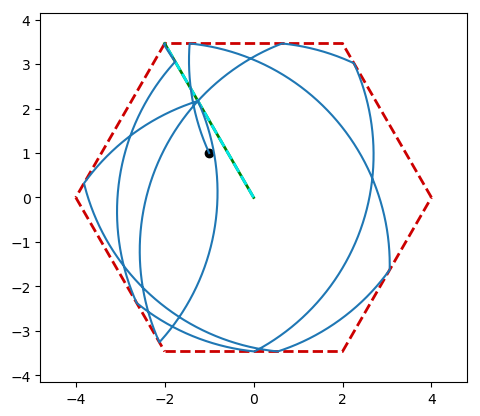

Laser wall: 7 Laser wall: 7 Laser wall: 7 Laser wall: 7 Laser wall: 7 

In [7]:
# env 1
polygon_n_vx = 6
polygon_boundary_len = 4.0
polygon_vertex = (r) -> [ [r*cos(2π*i/polygon_n_vx), r*sin(2π*i/polygon_n_vx)] for i in 1:polygon_n_vx]
polygonver = polygon_vertex(polygon_boundary_len)
# env 2
concave_quad = [[2.5,2.5],[0.0,1.0],[-2.5,2.5],[-2.5,-2.5],[2.5,-2.5]]

tangent_bounce_angle = 0.5*pi
angular_vel = -0.2
# Step 1: construct billiard with Splitter Wall
bd = Obstacle{Float64}[]
env_poly = polygonver
for i in eachindex(env_poly)
  starting = env_poly[i]
  ending = env_poly[mod1(i+1, length(env_poly))]
  w = ending - starting
  normal = [-w[2], w[1]]
  wall = SplitterWall(starting, ending, normal, "wall $i")
  push!(bd, wall)
end
center = [0., 0.]
# for i in eachindex(env_poly)
#     starting = center
#     ending = env_poly[i]
#     w = ending - starting
#     normal = [-w[2], w[1]]
#     j = i+polygon_n_vx
#     wall = LaserWall(starting, ending, normal, "wall $j")
#     push!(bd, wall)
# end

starting = center
ending = env_poly[2]
w = ending - starting
normal = [-w[2], w[1]]
j = 2+polygon_n_vx
wall = LaserWall(starting, ending, normal, "wall $j")
push!(bd, wall)

bd = Billiard(bd)
# plot(bd)

# Step 2: Define transmission function and refraction function  
# in our case, we never want the transmission happens (yet)
transmission_wall(p) = (φ, pflag, ω) -> begin
    0
end

transmission_laser_beam(p) = (φ, pflag, ω) -> begin
    1.1
end
# the refraction would be our bounce angles (with respect to the normal)
refraction_wall(φ, pflag, ω) = tangent_bounce_angle
refraction_laser_beam(φ, pflag, ω) = φ

# Step 3: Assign the transmission function and refraction to each wall
raywall = RaySplitter([1, 2, 3, 4, 5, 6], transmission_wall(0), refraction_wall)
laser_beam = RaySplitter([7], transmission_laser_beam(0), refraction_laser_beam)

# Step 4: Create a particle with initial x, initial y, initial heading angle, angular velocity |w| = 1/r
mp = MagneticParticle(-1, 1, 2, angular_vel)
xt, yt, vxt, vyt, tt = timeseries(mp, bd, 15, (raywall, laser_beam))
plot(bd)
plot(xt, yt)
scatter(xt[1], yt[1], color = "black")


# laser beam sensing: example; 
# obstacles: example;
# straight line in normal wall;
# bounce law
# use local version of dynamic billiard

# fading out older lines 
